<a href="https://colab.research.google.com/github/sauravkumar19/HEALTH-INSURANCE-CROSS-SELL-PREDICTION/blob/main/Copy_of_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [185]:
path = '/content/drive/MyDrive/AlmaBetter_Capstone_projects/capstone_project3/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv'
insurance_original=pd.read_csv(path)
insurance= insurance_original.copy()

In [186]:
insurance.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [187]:
insurance.shape

(381109, 12)

In [188]:
insurance[insurance.duplicated()]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


In [189]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [190]:
insurance.describe(include ='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


## Removing Outliers


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


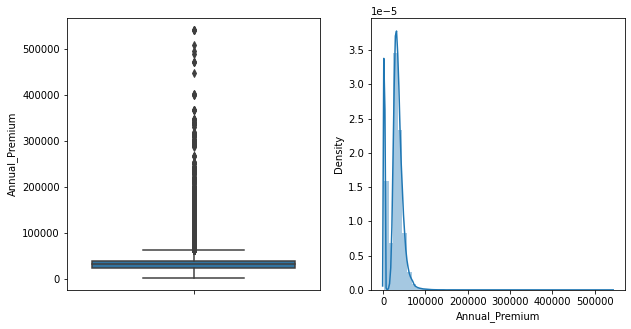

In [191]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
fig = sns.boxplot(y = insurance['Annual_Premium'])

plt.subplot(1,2,2)
fig = sns.distplot(insurance['Annual_Premium'])
plt.show()

In [192]:
len(insurance[insurance['Annual_Premium'] > 100000])

778

In [193]:
upper_limit = insurance['Annual_Premium'].quantile(0.99)
lower_limit = insurance['Annual_Premium'].quantile(0.01)
insurance = insurance[(insurance['Annual_Premium']<upper_limit) & (insurance['Annual_Premium'] > lower_limit)]
upper_limit

72963.0

In [194]:
lower_limit

2630.0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


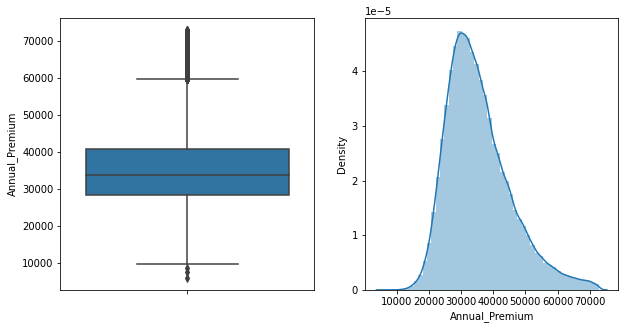

In [195]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
fig = sns.boxplot(y = insurance['Annual_Premium'])

plt.subplot(1,2,2)
fig = sns.distplot(insurance['Annual_Premium'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


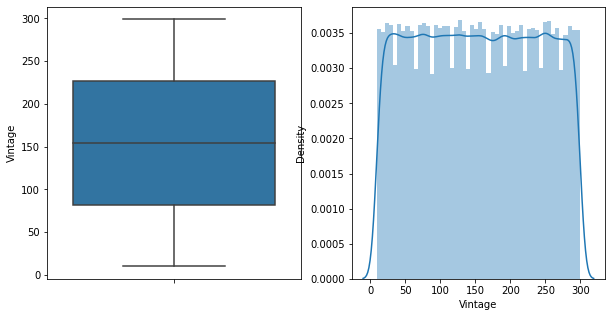

In [196]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
fig = sns.boxplot(y = insurance['Vintage'])

plt.subplot(1,2,2)
fig = sns.distplot(insurance['Vintage'])
plt.show()

##EDA

In [197]:
categorical = []
for col in insurance.columns:
  if insurance[col].nunique() < 12:
    categorical.append(col)

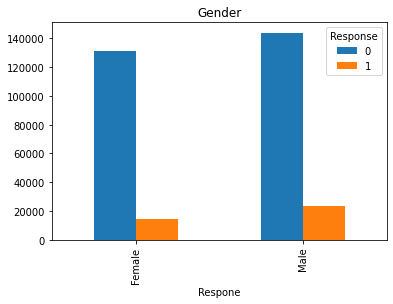

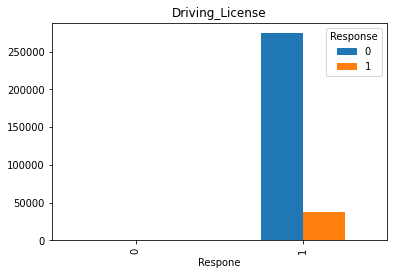

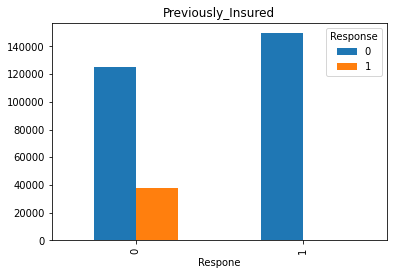

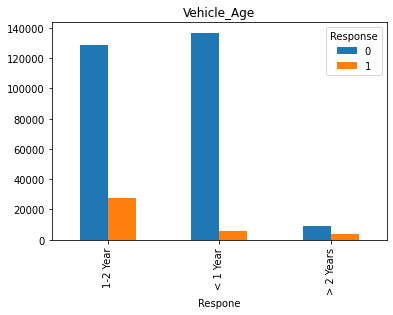

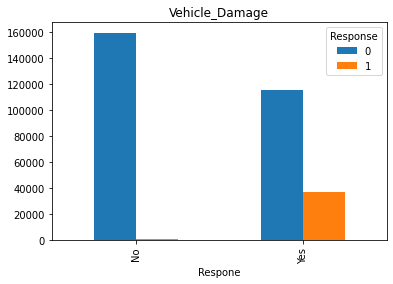

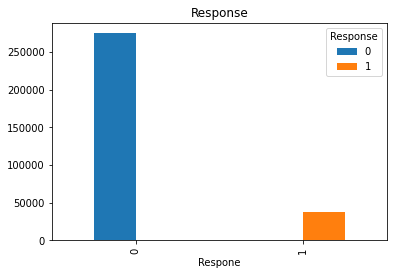

In [198]:
for col in categorical:
  table = insurance.groupby(col)['Response'].value_counts().unstack()
  table.plot(kind = 'bar')
  plt.xlabel('Respone')
  plt.title(col)
  plt.show()

In [199]:
numeric = []
for col in insurance.columns:
  if insurance[col].nunique() > 12:
    numeric.append(col)

In [200]:
numeric

['id',
 'Age',
 'Region_Code',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


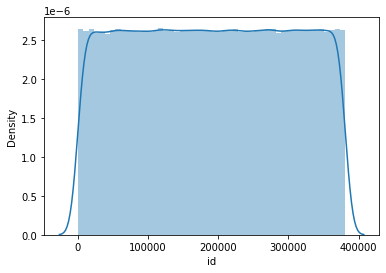

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


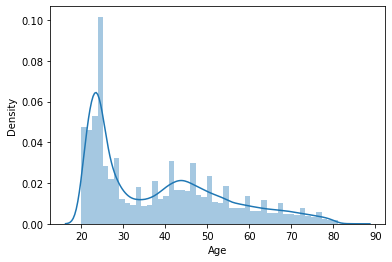

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


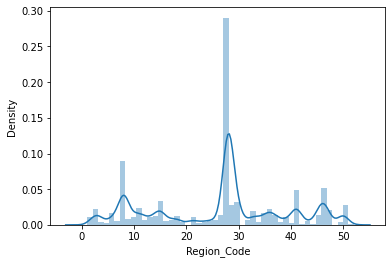

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


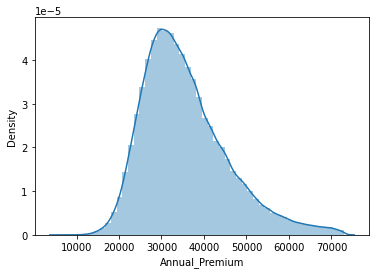

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


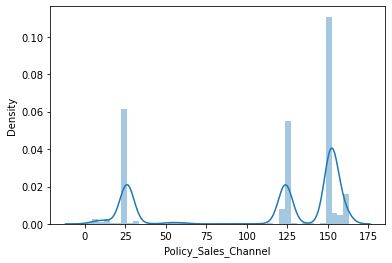

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


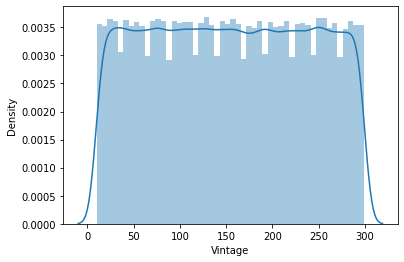

In [201]:
for col in numeric:
  sns.distplot(insurance[col])
  # table.plot(kind = 'hist')
  # plt.xlabel('Respone')
  # plt.title(col)
  plt.show()

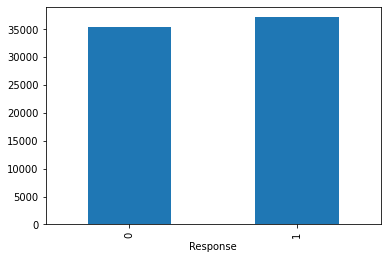

In [202]:
insurance.groupby('Response')['Annual_Premium'].mean().plot(kind = 'bar')

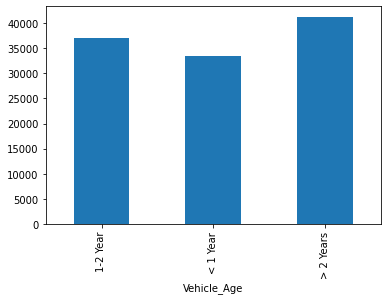

In [203]:
insurance.groupby('Vehicle_Age')['Annual_Premium'].mean().plot(kind = 'bar')

In [204]:
insurance.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

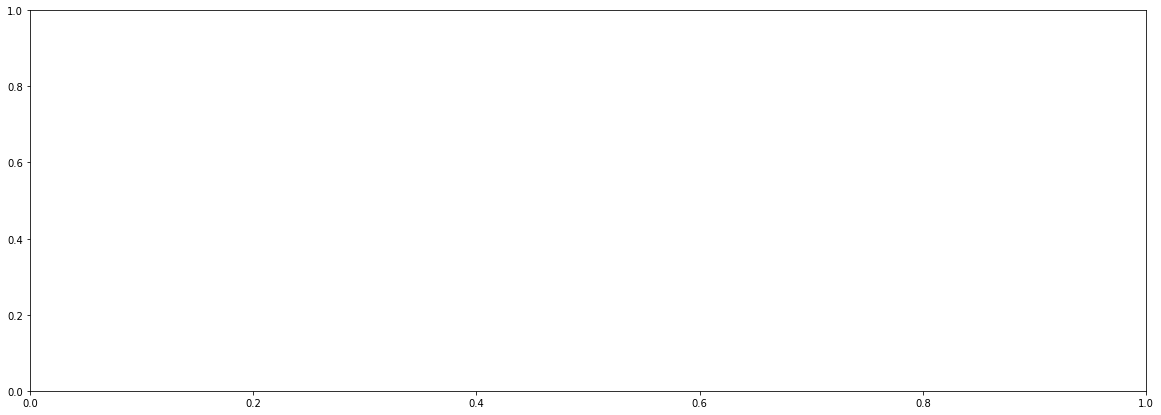

In [205]:
fig = plt.figure(figsize=(20,7))
ax = fig.gca()
a = insurance.groupby(['Region_Code'])['Response'].value_counts().unstack()

In [206]:
a['percentage'] = a[1]/(a[1]+a[0])

In [207]:
a['total'] = (a[1]+a[0])

In [208]:
a.sort_values(by= 'total', ascending = False)


Response,0,1,percentage,total
Region_Code,,,,
28.0,76555,17694,0.187737,94249
8.0,26496,2671,0.091576,29167
46.0,15277,1667,0.098383,16944
41.0,14082,1859,0.116618,15941
15.0,10337,747,0.067394,11084
30.0,9571,672,0.065606,10243
29.0,8020,1024,0.113224,9044
50.0,8474,533,0.059176,9007
11.0,6925,794,0.102863,7719


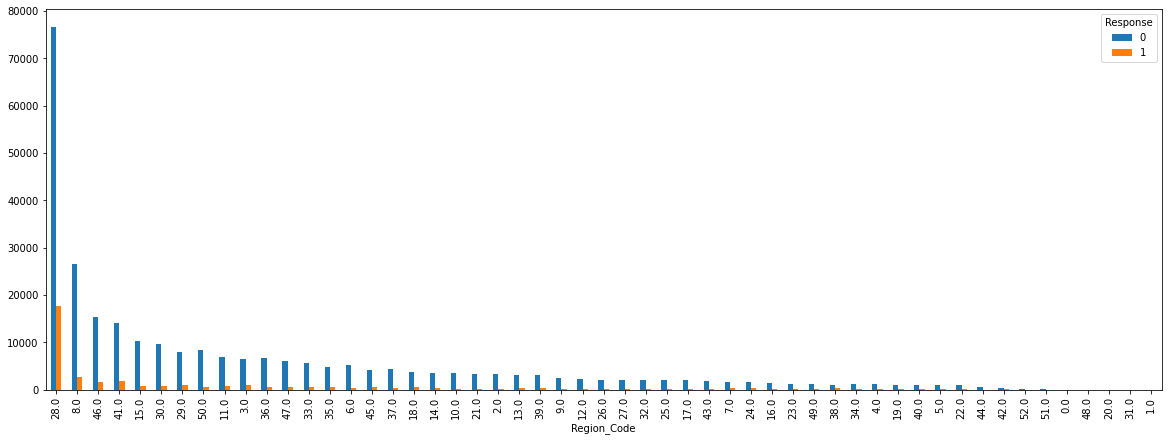

In [209]:
fig = plt.figure(figsize=(20,7))
ax = fig.gca()
a.sort_values(by= 'total', ascending = False).plot(kind = 'bar',y = [0,1],ax = ax)

In [210]:
b = insurance.groupby(['Policy_Sales_Channel'])['Response'].value_counts().unstack()

In [211]:
b.sort_values(by = [1,0],ascending = False)

Response,0,1
Policy_Sales_Channel,,
26.0,52720.0,13623.0
124.0,49369.0,11887.0
152.0,117659.0,3396.0
122.0,6844.0,1516.0
154.0,3556.0,1234.0
...,...,...
75.0,1.0,NaN
84.0,1.0,NaN
97.0,1.0,NaN


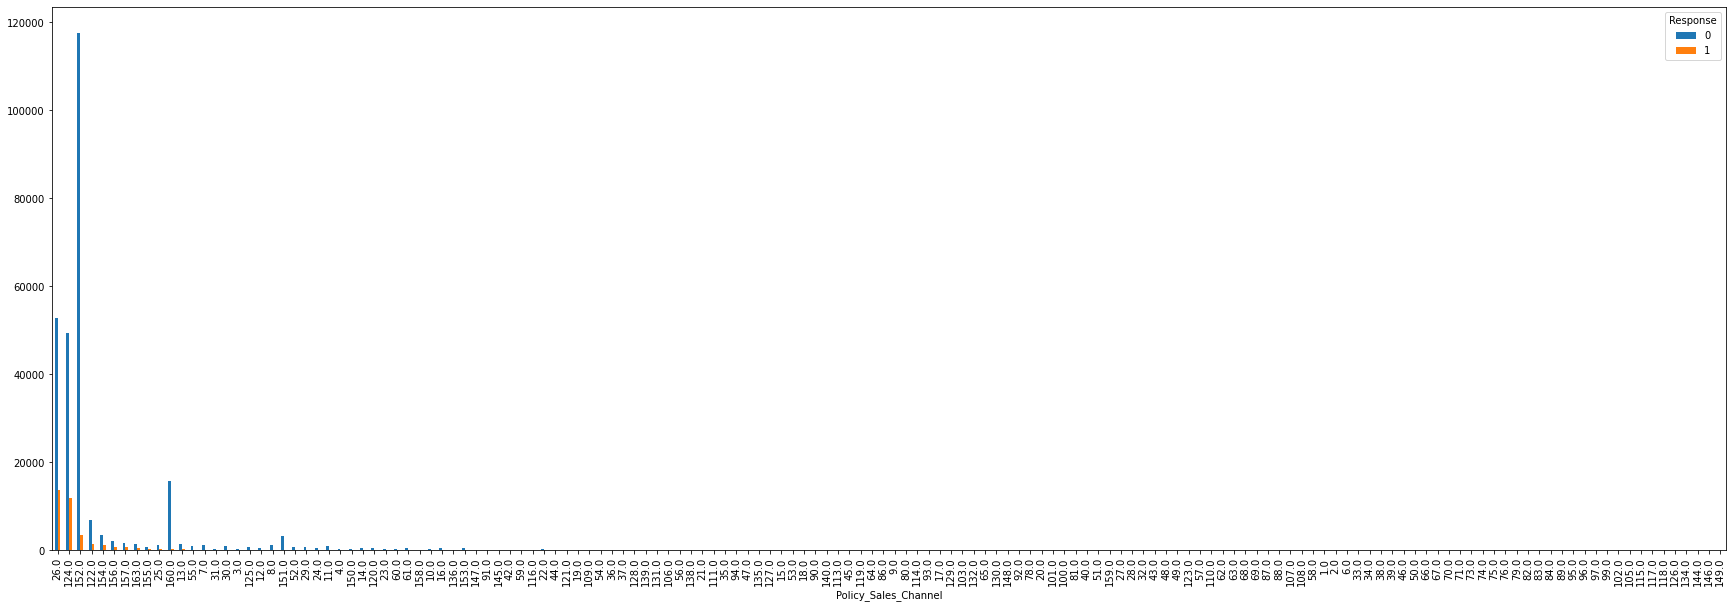

In [212]:
fig = plt.figure(figsize = (30,10))
ax = fig.gca()
b.sort_values(by = 1,ascending = False).plot(kind = 'bar',ax = ax)

##Feature enginnering

In [213]:
insurance.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [214]:
dict1 = {'Gender':{'Male':0,'Female':1},'Vehicle_Age':{'< 1 Year':0,'1-2 Year':1,'> 2 Years':2},'Vehicle_Damage':{'No':0,'Yes':1}}

In [215]:
insurance = insurance.replace(dict1)

In [216]:
def change_age(data):
  if data < 40:
    return 0
  elif 40<= data < 65:
    return 1
  else:
    return 2

In [217]:
insurance['Age'] = insurance['Age'].apply(change_age)

In [218]:
col1 = insurance.columns.drop('id','Response')

In [220]:
col1.drop('Response')

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

In [221]:
from sklearn.model_selection import train_test_split

In [222]:
x = insurance[col1]
y = insurance['Response']

In [223]:
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE
smote=BorderlineSMOTE(sampling_strategy={0:325634,1:300000})
x=insurance.loc[:, insurance.columns != 'Response']
y=insurance["Response"]
xsmote, ysmote = smote.fit_resample(x, y)

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (325634) in class 0 will be larger than the number of samples in the majority class (class #0 -> 274776)
  f"After over-sampling, the number of samples ({n_samples})"
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (300000) in class 1 will be larger than the number of samples in the majority class (class #0 -> 274776)
  f"After over-sampling, the number of samples ({n_samples})"


In [247]:
xtrain,xtest,ytrain,ytest = train_test_split(xsmote,ysmote, test_size = 0.2, random_state = 0)
xtrain.shape

(500507, 11)

In [248]:
ytrain.value_counts()

0    260535
1    239972
Name: Response, dtype: int64

In [249]:
ytest.value_counts()

0    65099
1    60028
Name: Response, dtype: int64

## Base line model(Logistic_resgression)

In [250]:
from sklearn.linear_model import LogisticRegression
logr =LogisticRegression()
logr.fit(xtrain,ytrain)

LogisticRegression()

In [251]:
logr.coef_

array([[ 4.47047082e-07, -1.12009749e-04, -1.41460066e-05,
        -2.66784490e-06,  1.70788379e-04, -2.19252033e-04,
         9.89221762e-05,  2.54017030e-04,  1.55972070e-05,
        -8.76669782e-03,  6.94176214e-04]])

In [252]:
train_prob = logr.predict_proba(xtrain)
test_prob = logr.predict_proba(xtest)

In [253]:
train_prob

array([[0.60824289, 0.39175711],
       [0.39393891, 0.60606109],
       [0.43716943, 0.56283057],
       ...,
       [0.68329691, 0.31670309],
       [0.36377968, 0.63622032],
       [0.64388507, 0.35611493]])

In [254]:
trained_prediction = logr.predict(xtrain)
test_prediction = logr.predict(xtest)

In [255]:
def model_checking(original,predicted,labels=["possibility1","possibility2"]):
  from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
  model_accuracy=accuracy_score(predicted,original)
  print("The accuracy of model is= ", model_accuracy,"\n")
  rocauc_score=roc_auc_score(original,predicted)
  print("The roc_auc score of model is= ", rocauc_score,"\n")
  print("Confusion matrix: \n")
  cm=confusion_matrix(original,predicted)
  print(cm)
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
  # labels, title and ticks
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

The accuracy of model is=  0.6104569966054421 

The roc_auc score of model is=  0.6056349421669259 

Confusion matrix: 

[[188368  72167]
 [122802 117170]]


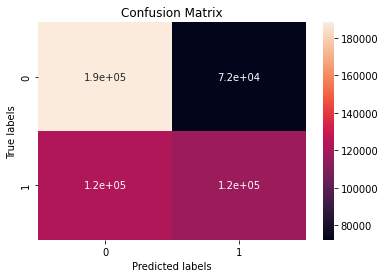

In [256]:
model_checking(ytrain,trained_prediction,labels=["0","1"])

The accuracy of model is=  0.6105476835535096 

The roc_auc score of model is=  0.6058734921076729 

Confusion matrix: 

[[46950 18149]
 [30582 29446]]


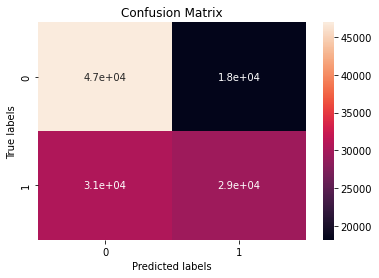

In [257]:
model_checking(ytest,test_prediction,labels=["0","1"])

Some how our Logistic regression gives baised result. So we try to convert Region_code, Policy_Sales_Channel and age columns into ordinal encoding. Also we use SMOTE to overcome the problem of unblancing. 

##Decision Tree

In [282]:
from sklearn.tree import DecisionTreeClassifier
Dt = DecisionTreeClassifier(criterion='entropy',random_state=0)
Dt.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [283]:
y_pred_train_dt = Dt.predict(xtrain)
y_pred_test_dt = Dt.predict(xtest)

In [284]:
y_pred_train_dt

array([1, 0, 0, ..., 0, 1, 0])

The accuracy of model is=  0.8874583423241986 

The roc_auc score of model is=  0.8873997203328697 

Confusion matrix: 

[[57863  7236]
 [ 6846 53182]]


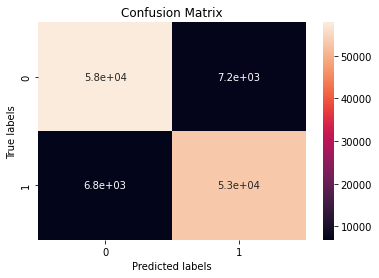

In [285]:
model_checking(ytest,y_pred_test_dt,labels=["0","1"])

The accuracy of model is=  1.0 

The roc_auc score of model is=  1.0 

Confusion matrix: 

[[260535      0]
 [     0 239972]]


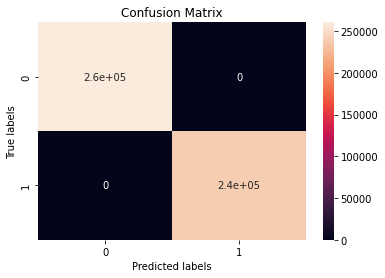

In [286]:
model_checking(ytrain,y_pred_train_dt,labels=["0","1"])

## Decision Tree Tuning

In [288]:
from sklearn.model_selection import GridSearchCV
grid_values = {'max_depth':[3,6,9], 'min_samples_leaf':[2,5,10],'min_samples_split':[10,50,100],'max_leaf_nodes':[5,20,50]}
tuned_dt = GridSearchCV(Dt, param_grid = grid_values, scoring = 'roc_auc', cv=5)
tuned_dt.fit(xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=0),
             param_grid={'max_depth': [3, 6, 9], 'max_leaf_nodes': [5, 20, 50],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [10, 50, 100]},
             scoring='roc_auc')

In [289]:
tuned_dt.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, max_leaf_nodes=50,
                       min_samples_leaf=2, min_samples_split=10,
                       random_state=0)

In [290]:
tuned_dt__train_pred = tuned_dt.predict(xtrain)
tuned_dt_test_pred = tuned_dt.predict(xtest)

In [291]:
print(classification_report(ytrain,tuned_dt__train_pred))
print("\n")
print(classification_report(ytest,tuned_dt_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86    260535
           1       0.82      0.91      0.86    239972

    accuracy                           0.86    500507
   macro avg       0.86      0.86      0.86    500507
weighted avg       0.86      0.86      0.86    500507



              precision    recall  f1-score   support

           0       0.90      0.81      0.85     65099
           1       0.81      0.91      0.86     60028

    accuracy                           0.85    125127
   macro avg       0.86      0.86      0.85    125127
weighted avg       0.86      0.85      0.85    125127



The accuracy of model is=  0.8572287700271924 

The roc_auc score of model is=  0.85923867526518 

Confusion matrix: 

[[211116  49419]
 [ 22039 217933]]


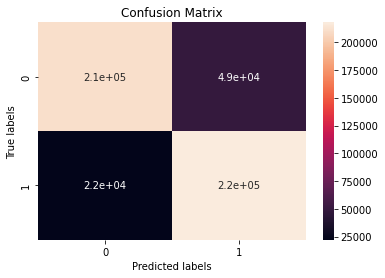

In [292]:
model_checking(ytrain, tuned_dt__train_pred,labels=["0","1"])

The accuracy of model is=  0.8533969487001207 

The roc_auc score of model is=  0.855431238674997 

Confusion matrix: 

[[52420 12679]
 [ 5665 54363]]


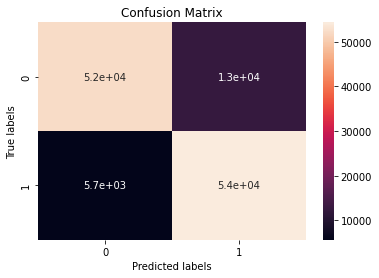

In [293]:
model_checking(ytest, tuned_dt_test_pred,labels=["0","1"])

In [294]:
tuned_dt.best_score_

0.9342729152042579

In [263]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
#grid_values = {'n_estimators':[50, 80, 100], 'max_depth':[6, 8]}
#model5 = GridSearchCV(gbc, param_grid = grid_values, scoring = 'roc_auc', cv=5)

gbc.fit(xtrain,ytrain)

GradientBoostingClassifier()

In [264]:
test_predicted=gbc.predict(xtest)
train_predicted=gbc.predict(xtrain)

The accuracy of model is=  0.8642836164129573 

The roc_auc score of model is=  0.865734238065455 

Confusion matrix: 

[[216355  44180]
 [ 23747 216225]]


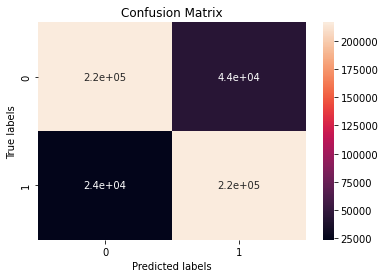

In [265]:
model_checking(ytrain, train_predicted,labels=["0","1"])

The accuracy of model is=  0.8615966178362784 

The roc_auc score of model is=  0.8630831535287475 

Confusion matrix: 

[[53798 11301]
 [ 6017 54011]]


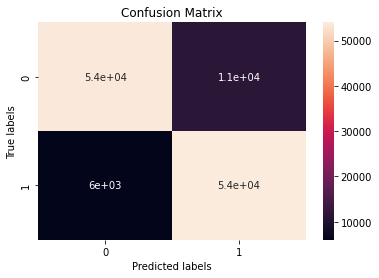

In [266]:
model_checking(ytest, test_predicted,labels=["0","1"])

In [267]:
from sklearn.metrics import classification_report

In [268]:
print(classification_report(ytrain,train_predicted))
print("\n")
print(classification_report(ytest,test_predicted))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86    260535
           1       0.83      0.90      0.86    239972

    accuracy                           0.86    500507
   macro avg       0.87      0.87      0.86    500507
weighted avg       0.87      0.86      0.86    500507



              precision    recall  f1-score   support

           0       0.90      0.83      0.86     65099
           1       0.83      0.90      0.86     60028

    accuracy                           0.86    125127
   macro avg       0.86      0.86      0.86    125127
weighted avg       0.86      0.86      0.86    125127

